# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy.stats import ttest_ind_from_stats # importing the t-test function for independent samples
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head(20)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

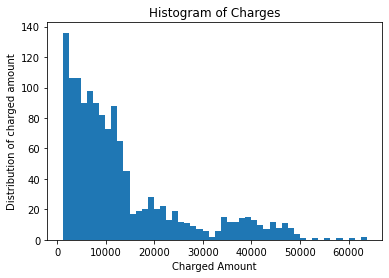

In [4]:
# Plotting Histogram
_ = plt.hist(medical['charges'], bins = 50)
_ = plt.xlabel('Charged Amount')
_ = plt.ylabel('Distribution of charged amount')
_ = plt.title('Histogram of Charges')

In [5]:
# Calculating mean and standard deviation
Charges_mean = medical['charges'].mean()
print('Average charged amount = ', Charges_mean)
Charges_std = medical['charges'].std()
print('Standard deviation of charged amount = ', Charges_std)

Average charged amount =  13270.422265141257
Standard deviation of charged amount =  12110.011236693994


In [6]:
distribution_28000 = medical[medical['charges'] <28000].shape
print(' Number of cases with medical expenses less than 28000 = ', distribution_28000[0])
print('Percentage of cases with medical expenses less than 28000 = ', distribution_28000[0] / medical.shape[0] * 100)

 Number of cases with medical expenses less than 28000 =  1164
Percentage of cases with medical expenses less than 28000 =  86.99551569506725


Based on the histogram above - bulk of the data is concentrated between the low hundreds and about \\$15000, with few values as extreme as \\$60000 and more. The extreme values could be outliers or possibly treatment expenses for severe illnesses. Since more than 86% of the cases have medical expenses less than \\$28000, the mean and standard deviation are fair estimates of the data. 

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Given that the values of the mean and standard deviation are just for one sample of 1338 records, it is difficult to say with certainty if the administrators concerns are valid or not. For this specific sample it can be said that concern may not be valid. However for another sample, it may well be possible that the mean is below \\$12000, validating her concerns. Hence one would have to apply hypothesis testing to check if her claims are valid or not. Given that we are only able to ***estimate*** the population standard deviation, we can use the t-score test to check the administrators claims.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Given that the administrator is interested in the case of the value falling below \\$12000, we are interested in a one sided interval. A 99% confidence interval is more appropriate in this case since it allows us to be more certain as to if the average charge has fallen below \\$12000 or not. 

In [10]:
sample_charges_mean = np.mean(medical['charges']) # mean of sample of charges given in the Dataframe -bar{x}
sample_charges_std = np.std(medical['charges']) # stnadard deviation of sample of charges given in the df - s
print(f' Mean of the Sample = {sample_charges_mean}')
print(f'Standard deviation of the Sample = {sample_charges_std}')

 Mean of the Sample = 13270.422265141257
Standard deviation of the Sample = 12105.484975561605


In [18]:
conf_intr = 0.95 # Setting confidence interval to 95%
alpha = 1 - conf_intr # calculating alpha value based on confidence interval
alpha2 = alpha / 2 # dividing by two - used only for a two tailed test.
print(" Alpha value used for t score calculation : ", alpha)

# use 1- alpha for one tailed test. 
#Calculating degrees of freedom based on sample size as n - 1. Here sample size is the no. of rows in the dataframe
df = medical.shape[0] - 1 

# Assume that the null hypothesis is that the average charge is less than $12000. Your main aim will always be to 
# try and disprove the null hypothesis.
# Calculating confidence intervals using t score: 
t_score = t.ppf(1 - alpha, df)

MarginError_t = round(t_score * sample_charges_std / np.sqrt(medical.shape[0]), 2)
print(' Margin of Error using t-score for a one tailed test = ', MarginError_t)

# Calculating 95% confidence intervals : 
lower_limit = round(sample_charges_mean - abs(MarginError_t), 2)
upper_limit = round(sample_charges_mean + abs(MarginError_t), 2)

print(f'95% Confidence intervals are : {lower_limit}, {upper_limit}')



 Alpha value used for t score calculation :  0.050000000000000044
 Margin of Error using t-score for a one tailed test =  544.73
95% Confidence intervals are : 12725.69, 13815.15


Given that the true value of the test statistic ( the mean) lies within the range of \\$12725 to \\$13815, we can say with 95% confidence that the average is more than \\$12000. 

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ For two independent sample tests the null and alternative hypothesis are : 

H_0 - People with insurance are charged the same as people without insurance.  $\bar{x1}$ = $\bar{x2}$ 

H_a - People with insurance are charged a different amount than people without. $\bar{x1}$ != $\bar{x2}$ 

Since this test statistic can go either way, we will perform a two tailed test. We are making the assumption that the scatter of the two samples are the same. In other words the variances of the two groups are homogenous.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

## Using the manual method

In [31]:
# Hypothesis testing using manual method : 

# We start by finding the sample sizes of those with insurance and those without. From the medical dataframe: 
# N0 = count of people without insurance or where 'insuranceclaim' = 0
# N1 = count of people with insurance or where 'insuranceclaim' = 1




In [35]:
insured_charges = medical[medical['insuranceclaim'] == 1]['charges'].tolist()

N1 = len(insured_charges) # sample size of people with insurance
print(' Number of people insured: ', N1)

 Number of people insured:  783


In [36]:
uninsured_charges = medical[medical['insuranceclaim'] == 0]['charges'].tolist()

N0 = len(uninsured_charges)# sample size of people without insurance
print(' Number of people uninsured: ', N0)

 Number of people uninsured:  555


In [45]:
s1 = np.std(insured_charges) # calculating standard deviation of insured charges
x1 = np.mean(insured_charges) # calculating mean of insured charges
print('Mean of sample of charges to people with insurance : ', x1)
print('Standard deviation of sample of charges to people with insurance : ', s1)

Mean of sample of charges to people with insurance :  16423.928276537677
Standard deviation of sample of charges to people with insurance :  14036.956250260417


In [46]:
s0 = np.std(uninsured_charges) # calculating standard deviation of uninsured charges
x0 = np.mean(uninsured_charges) # calculating mean of uninsured charges
print('Mean of sample of charges to people without insurance : ', x0)
print('Standard deviation of sample of charges to people without insurance : ', s0)

Mean of sample of charges to people without insurance :  8821.421892306305
Standard deviation of sample of charges to people without insurance :  6440.699841605235


In [47]:
# Pooled standard deviation calculation
DoF_pooled = N0 + N1 - 2 # calculating degrees of Freedom
P0 = (N0 - 1) * (s0 ** 2)
P1 = (N1 - 1) * (s1 ** 2)
Sp = np.sqrt((P0 + P1) / DoF_pooled)
print(' Pooled Standard deviation = ', Sp)

 Pooled Standard deviation =  11512.282899205748


In [49]:
# t-score calculation : 
t_pooled_calculated = (x0 - x1) / (Sp * np.sqrt(( 1 / N0) + ( 1 / N1)))
print(' Manual calculated t-score : ', t_pooled_calculated)

 Manual calculated t-score :  -11.901306943555388


In [54]:
# calculating p-value for the t-statistic : 
CDF_t_pooled = t.cdf(abs(t_pooled_calculated), DoF_pooled)
print(" Probability of t-statistic", CDF_t_pooled)

p_value = (1 - CDF_t_pooled) * 2
print (' p-value of t-statistic = ', p_value)

 Probability of t-statistic 1.0
 p-value of t-statistic =  0.0


In [50]:
# Calculating t score using the lookup table for 95% confidence interval: 
confidence_int = 0.95 # 95% confidence interval
alpha = 1 - confidence_int # calculating alpha 
alpha2 = alpha / 2 # calculating alpha / 2 for two tailed test. 
t_pooled_lookup = t.ppf(1 - alpha2, DoF_pooled) # calculating t score from look up table for a two tailed test
print(' t-score from lookup table for 95% CI : ', t_pooled_lookup)



 t-score from lookup table for 95% CI :  1.9617412190546957


In [55]:
# Comparing the p value with the alpha - 
if p_value < alpha : 
    print(' Reject Null Hypothesis that the means are equal.')
else: 
    print(' Accept the null hypothesis are equal.')

 Reject Null Hypothesis that the means are equal.


## Calculating using Python method for independent sample tests

In [60]:
t_stat_python, p_value_python = ttest_ind_from_stats(mean1 = x1, std1 = s1, nobs1 = N1, 
                                                     mean2 = x0, std2 = s0, nobs2 = N0, 
                                                     equal_var = True)
print('t-statistic calculated from Python function : ', t_stat_python) 
print('p-value using python : ',p_value_python)

t-statistic calculated from Python function :  11.901306943555388
p-value using python :  4.090550214373679e-31


# Conclusion

We can see that the values for the t-statistic and the p-value are similar from both the methods. 
Subsequently since the p-value < alpha we can reject the Null hypothesis that the two means are equal. Hence the two groups are charged differently. 

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There is no equivalent functions for the z-score. A possible reason or this could be since t-test is used to infer data about the populations from the sample. The z-score however is performed on an entire population. In reality however we never have complete information about the population and hence it may not be an accurate test to perform. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test